# I - Code d'origine

 source du code d'origine : https://www.kaggle.com/code/setyoab/heart-attack-analysis-using-logisticregression

In [18]:
# On importe les librairies

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [25]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# On importe le dataset 

df = pd.read_csv("heart.csv")
print(f"data shape : {df.shape}")

data shape : (303, 14)


In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot: >

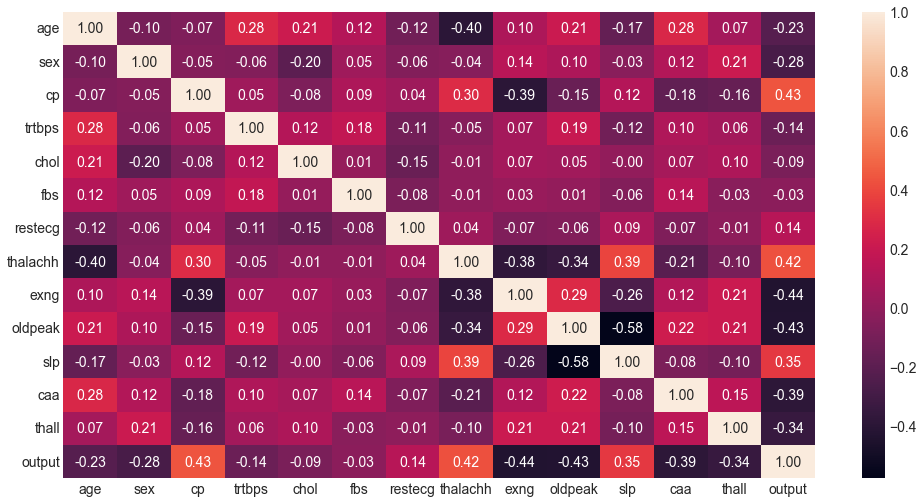

In [43]:
# heatmap de corrélation

plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, fmt = ".2f")


## EDA

Text(0.5, 1.0, 'rest ecg based on output')

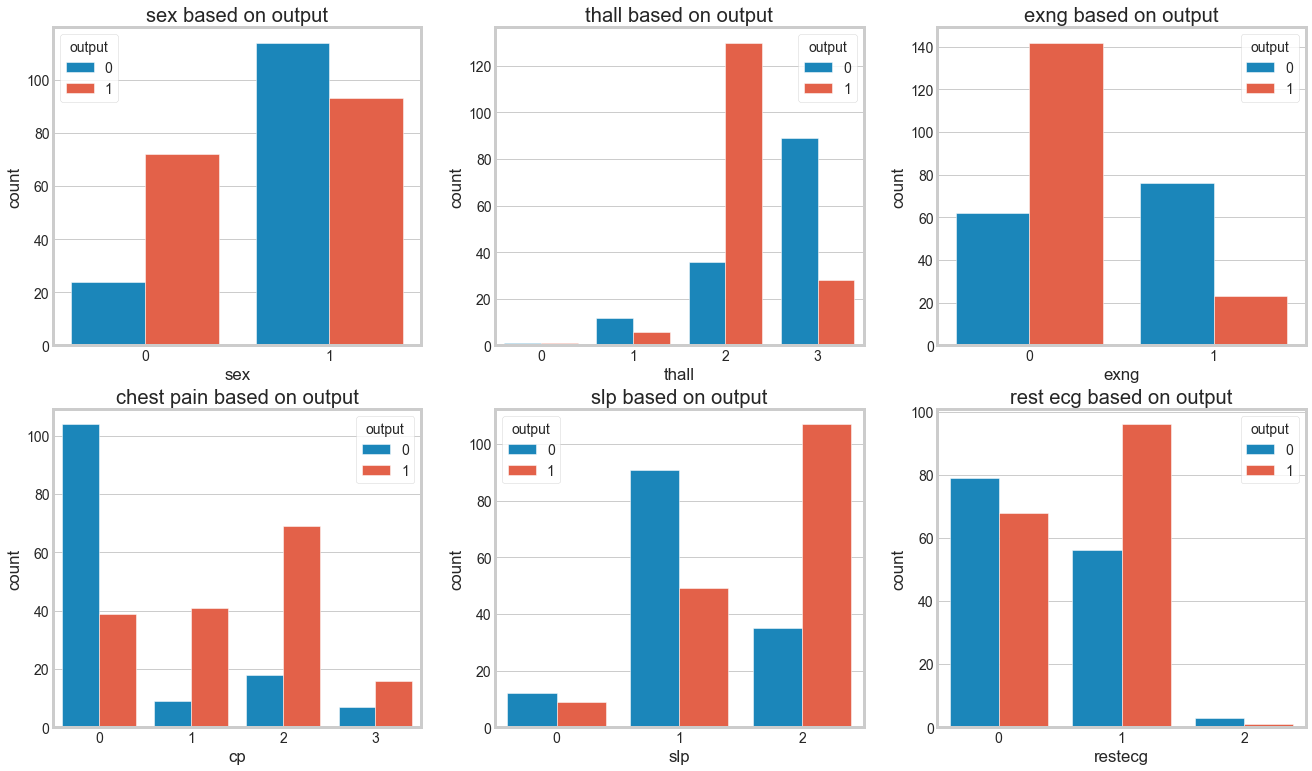

In [44]:
fig,axes = plt.subplots(2,3,figsize=(20,12))
col = ['sex', 'thall', 'exng']
sns.countplot(ax = axes[0, 0], data = df, x = 'sex', hue ='output')
sns.countplot(ax = axes[0, 1],data = df, x = 'thall', hue = 'output')
sns.countplot(ax = axes[0, 2],data = df, x = 'exng', hue = 'output')
sns.countplot(ax = axes[1, 0],data = df, x = 'cp', hue = 'output')
sns.countplot(ax = axes[1, 1],data = df, x = 'slp', hue = 'output')
sns.countplot(ax = axes[1, 2],data = df, x = 'restecg', hue = 'output')


# adding title to each subplots
axes[0,0].set_title('sex based on output')
axes[0,1].set_title('thall based on output')
axes[0,2].set_title('exng based on output')
axes[1,0].set_title('chest pain based on output')
axes[1,1].set_title('slp based on output')
axes[1,2].set_title('rest ecg based on output')


Text(0.5, 1.0, 'Age countplot')

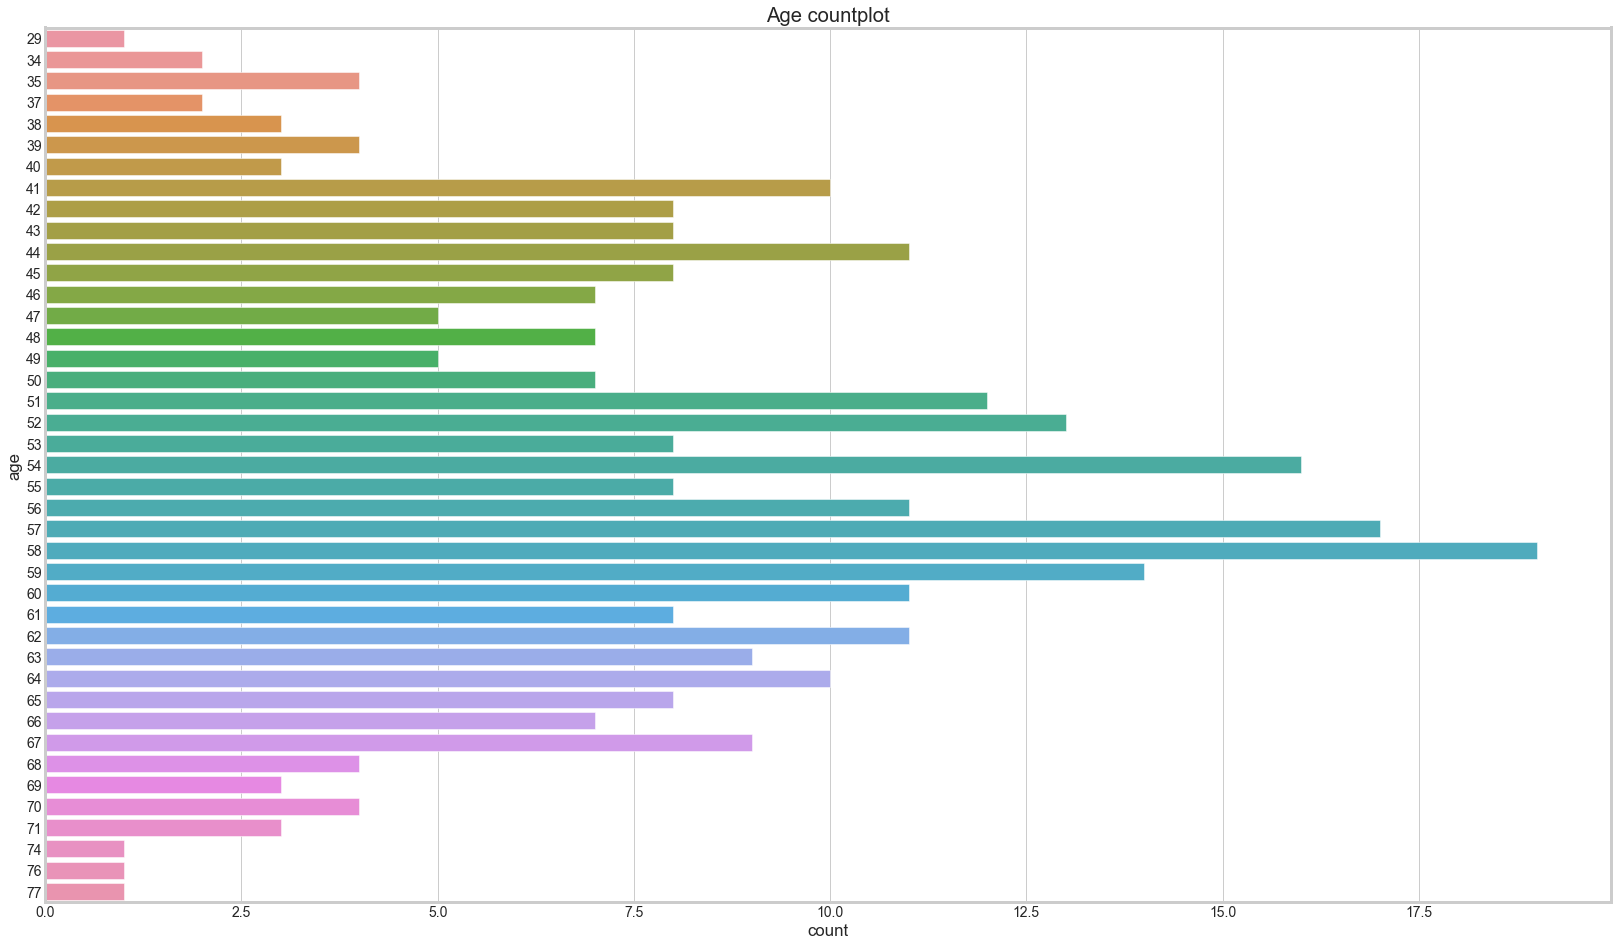

In [45]:
plt.figure(figsize=(25,15))
sns.countplot(data = df, y = df['age'])
plt.title('Age countplot')

<Figure size 720x576 with 0 Axes>

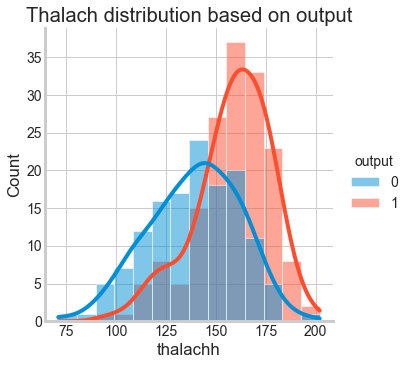

In [46]:
plt.figure(figsize=(10,8))
sns.displot(data = df, x = 'thalachh', kde = True, hue = 'output')
plt.title('Thalach distribution based on output')
plt.show()

Text(0.5, 1.0, 'cholesterol based on output')

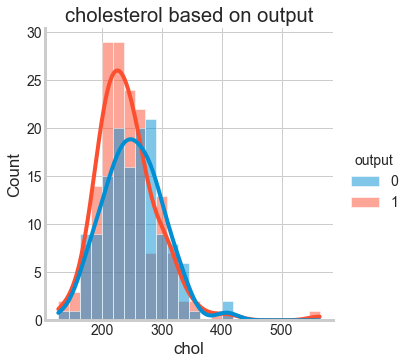

In [47]:
sns.displot(data = df, x = 'chol', kde = True, hue = 'output')
plt.title('cholesterol based on output')

## Création du Modèle

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [116]:
X = df.drop("output",  axis = 1)
y = df["output"]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [118]:
log_model = LogisticRegression(solver = "lbfgs",
                               max_iter = 1000)

log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [119]:
pred = log_model.predict(X_test)

In [120]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [121]:
print(f"accuracy on test set : {log_model.score(X_test, y_test)}")

accuracy on test set : 0.8852459016393442


Matrix de confusion [[25  4]
 [ 3 29]]
Report Classification               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



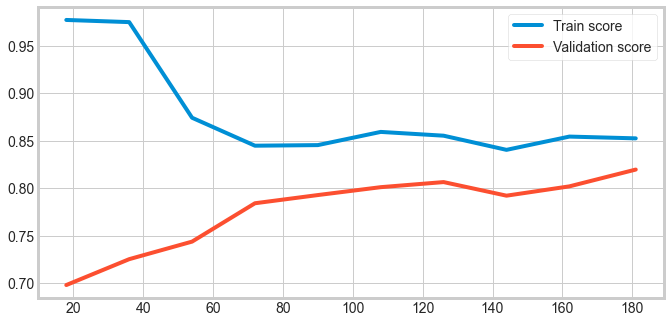

In [122]:
evaluation(log_model)

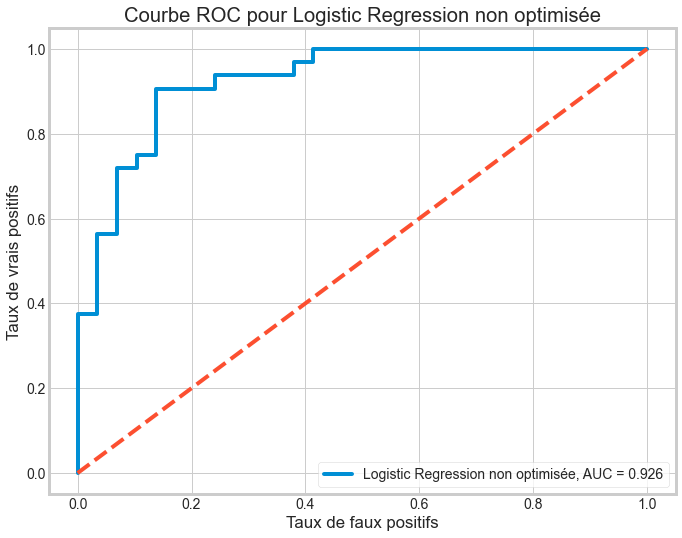

In [123]:
# Création courbes ROC
# Initialiser les modèles
models = [log_model]
model_names = ['Logistic Regression non optimisée']

# Boucle sur les modèles pour les entraîner et prédire les probabilités
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # Calculer la courbe ROC et AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # Afficher la courbe ROC
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, label=name + ', AUC = %0.3f' % auc)
    
# Ajouter des annotations et légendes

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour Logistic Regression non optimisée')
plt.legend()

# Afficher la figure
plt.show()

# II - Phase d'optimisation

## Analyse de la colonne target
On va analyser la répartition des deux valeures target, afin ,de voir si notre dataset est équilibré ou non

In [32]:
# On vérifie la distribution de notre target

df["output"].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: output, dtype: float64

On voit que notre dataset est plutot équilibré, nous n'avons donc pas besoin de faire un travail de traitement des données dans ce sens

In [33]:
# Recherche de corrélations par rapport à notre target

cor_matrix = df.corr()
cor_matrix["output"].sort_values(ascending = False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

On voit que 3 variables ont une corrélation positive sur notre target :
 - cp : 0.434 
 - thalachh : 0.422 
 - slp : 0.346

3 variables ont aussi une corrélation négative sur notre target : 
- exng : -0.437
- oldpeak : -0.431
- caa : -0.392

Nous n'avons aucune corralation linéaire vis à vis de notre target.

## Preprocessing

In [21]:
# Création d'un pipeline

from sklearn.pipeline import make_pipeline

# Utilisation de RobusScaller 
from sklearn.preprocessing import RobustScaler

# Import de nos modèles de machine learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

import numpy as np

import pickle

In [22]:
# Création de notre dataset d'entrainement et de validation

X = df.drop("output",  axis = 1)
y = df["output"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
# Creation de nos différents modèles

model_log_Reg = make_pipeline(RobustScaler(), 
                      LogisticRegression(max_iter = 10000))

model_dec_tree_class = make_pipeline(RobustScaler(), 
                      DecisionTreeClassifier())

model_SVC = make_pipeline(RobustScaler(), 
                      SVC(probability = True))

model_grad_boost = make_pipeline(RobustScaler(), 
                     GradientBoostingClassifier())


### Test des modèles sans optimisation des hyper paramètres

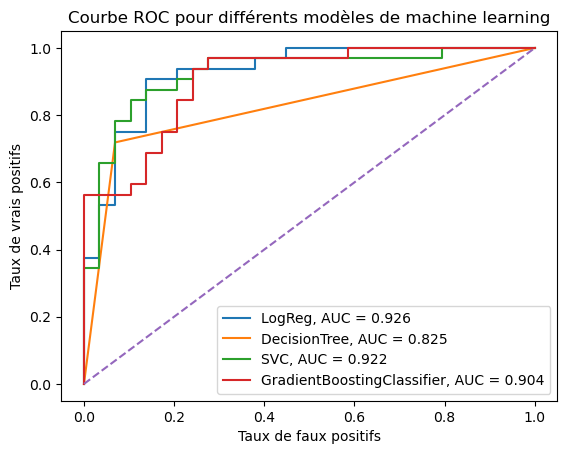

In [26]:
# Création courbes ROC
# Initialiser les modèles
models = [model_log_Reg, model_dec_tree_class, model_SVC, model_grad_boost]
model_names = ['LogReg', 'DecisionTree', 'SVC', "GradientBoostingClassifier"]

# Boucle sur les modèles pour les entraîner et prédire les probabilités
for model, name in zip(models, model_names):


    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # Calculer la courbe ROC et AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # Afficher la courbe ROC
    
    plt.plot(fpr, tpr, label=name + ', AUC = %0.3f' % auc)
    
# Ajouter des annotations et légendes
    
    
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour différents modèles de machine learning')
plt.legend()

# Afficher la figure
plt.show()

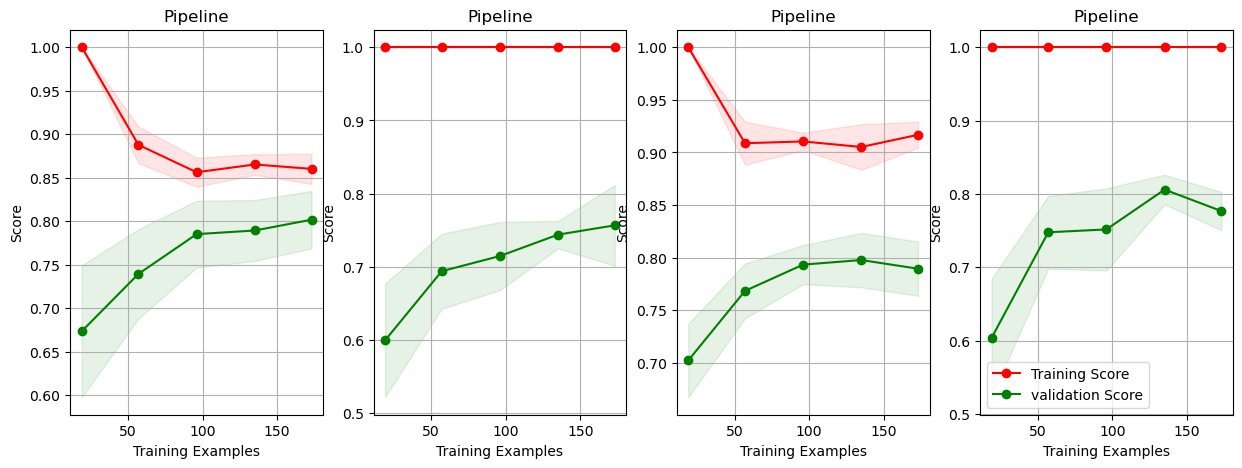

In [27]:
# Courbe d'apprentissage

fig, axes = plt.subplots(1, len(models), figsize=(15, 5))
for i, model,  in enumerate(models, ):
    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    axes[i].set_title(type(model).__name__)
    axes[i].set_xlabel("Training Examples")
    axes[i].set_ylabel("Score")
    axes[i].grid()
    axes[i].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes[i].fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
    axes[i].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    axes[i].plot(train_sizes, val_scores_mean, 'o-', color="g", label="validation Score")
plt.legend(loc="best")

### Optimisation de nos modèles avec GridSearchCv

In [28]:
def evaluation(model):
    
    #model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    
    print(f"Matrix de confusion {confusion_matrix(y_test,ypred)}")
    print(f"Report Classification {classification_report(y_test,ypred)}")
    
    N,train_score,val_score=learning_curve(model,X_train,y_train,cv=4,train_sizes=np.linspace(0.1,1,10),
                                            scoring="precision")
    
    plt.figure(figsize=(10,5))
    plt.plot(N,train_score.mean(axis=1),label="Train score")
    plt.plot(N,val_score.mean(axis=1),label="Validation score")
    plt.legend()

In [39]:
# Création de nos paramètres

param_grid_SVC = {'svc__C': (0.001, 0.01, 0.1, 1, 10, 100), 
                  'svc__kernel': ['linear', 'rbf', "sigmoid", "poly"], 
                  'svc__gamma': ["scale", "auto"],
                  "svc__degree": range(1,5)}

param_grid_log_reg = {"logisticregression__penalty": ["l1", "l2", "elasticnet"],
                      "logisticregression__C": (0.001, 0.01, 0.1, 1, 10, 100),
                      "logisticregression__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga", "newton-cholesky"]
                      
                      }

param_grid_dec_tree = {"decisiontreeclassifier__max_depth": range(1, 100, 10),
                       "decisiontreeclassifier__min_samples_split": range(1, 100, 10),
                       "decisiontreeclassifier__min_samples_leaf": range(1, 100, 10),
                       "decisiontreeclassifier__max_features": range(1, 100, 10),
                       "decisiontreeclassifier__criterion": ["gini", "entropy"]


}

param_grid_grad_boost = {"gradientboostingclassifier__loss": ["log_loss", "deviance", "exponential"],
                         "gradientboostingclassifier__learning_rate": (0.0001,0.001, 0.01, 0.1, 1, 1.001, 1.01, 1.1),
                         "gradientboostingclassifier__criterion": ["friedman_mse", "squarred_error"],
                         "gradientboostingclassifier__max_depth": range(1, 100),
                         "gradientboostingclassifier__max_features": ["auto", "sqrt", "log2"],
                         "gradientboostingclassifier__ccp_alpha": (0.0001, 0.001, 0.01, 0.1, 1)


}


In [30]:

def optimisation(model, param_grid):

    grid = GridSearchCV(model, param_grid= param_grid, cv = 5, scoring = "precision", verbose = 2, n_jobs = -1)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    print(grid.best_estimator_)
    return (grid.best_estimator_)

### Logistic Regression

In [132]:
best_model_log_reg = optimisation(model_log_Reg, param_grid_log_reg)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
0.8339819600689167
Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.001, max_iter=10000,
                                    solver='liblinear'))])


Matrix de confusion [[25  4]
 [ 8 24]]
Report Classification               precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



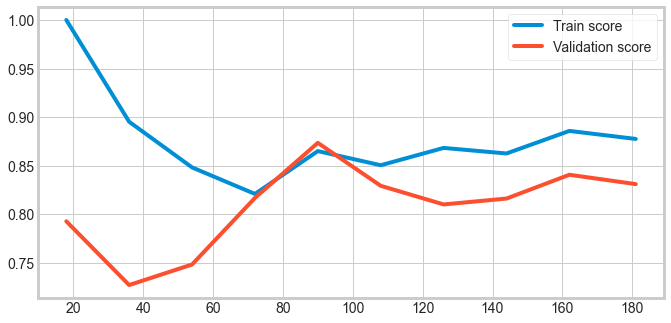

In [133]:
evaluation(best_model_log_reg)

In [134]:
#Sauvegarde du modèle

with open('modeles/LogisticRegression.pkl', 'wb') as file:
    pickle.dump(best_model_log_reg, file)

### Decision Tree

In [135]:
best_model_decision_tree = optimisation(model_dec_tree_class, param_grid_dec_tree)

Fitting 5 folds for each of 20000 candidates, totalling 100000 fits
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 41, 'decisiontreeclassifier__max_features': 11, 'decisiontreeclassifier__min_samples_leaf': 21, 'decisiontreeclassifier__min_samples_split': 31}
0.8450243664717348
Pipeline(steps=[('robustscaler', RobustScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=41,
                                        max_features=11, min_samples_leaf=21,
                                        min_samples_split=31))])


Matrix de confusion [[23  6]
 [ 4 28]]
Report Classification               precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



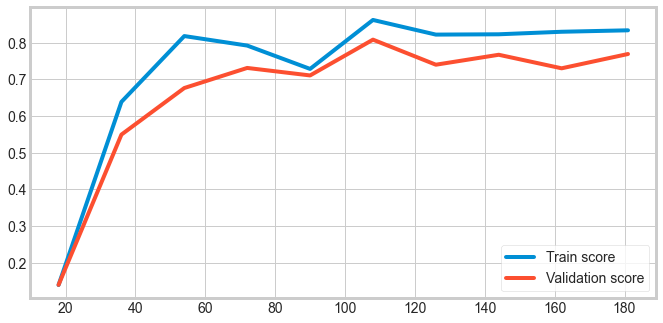

In [136]:
evaluation(best_model_decision_tree)

In [137]:
# Sauvegarde du modèle

with open('modeles/DecisionTree.pkl', 'wb') as file:
    pickle.dump(best_model_decision_tree, file)



# GradientBoostingClassifier

In [40]:
best_model_grad_boost = optimisation(model_grad_boost, param_grid_grad_boost)

Fitting 5 folds for each of 71280 candidates, totalling 356400 fits
{'gradientboostingclassifier__ccp_alpha': 0.0001, 'gradientboostingclassifier__criterion': 'friedman_mse', 'gradientboostingclassifier__learning_rate': 1.01, 'gradientboostingclassifier__loss': 'deviance', 'gradientboostingclassifier__max_depth': 23, 'gradientboostingclassifier__max_features': 'sqrt'}
0.8732064907717081
Pipeline(steps=[('robustscaler', RobustScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0001,
                                            learning_rate=1.01, loss='deviance',
                                            max_depth=23,
                                            max_features='sqrt'))])


Matrix de confusion [[25  4]
 [ 8 24]]
Report Classification               precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



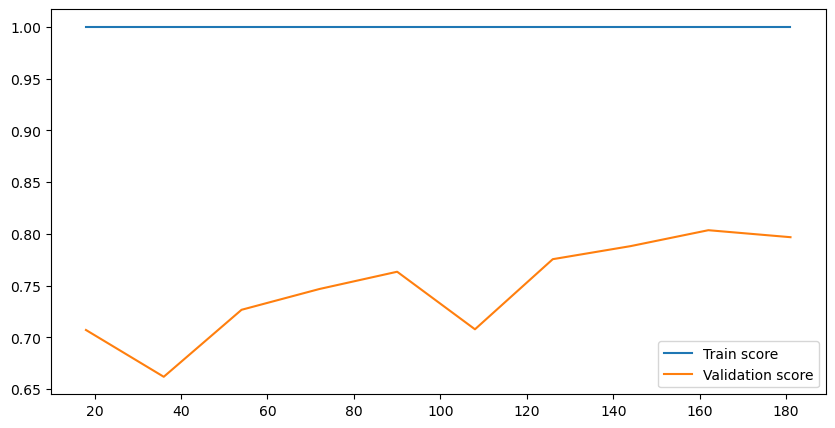

In [41]:
evaluation(best_model_grad_boost)

In [43]:
# Sauvegarde du modèle

with open('modeles/GradientBoost.pkl', 'wb') as file:
    pickle.dump(best_model_grad_boost, file)

### SVC

In [138]:
best_model_SVC = optimisation(model_SVC, param_grid_SVC)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
{'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
0.8228292996358965
Pipeline(steps=[('robustscaler', RobustScaler()),
                ('svc', SVC(C=1, degree=1, kernel='linear', probability=True))])


Matrix de confusion [[25  4]
 [ 4 28]]
Report Classification               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



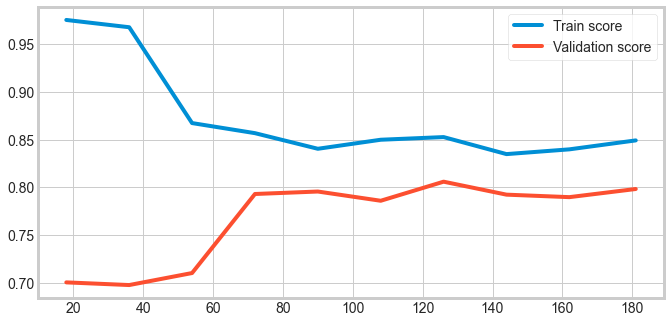

In [139]:
evaluation(best_model_SVC)

In [140]:
# Sauvegarde du modèle

with open('modeles/SVC.pkl', 'wb') as file:
    pickle.dump(best_model_SVC, file)

### Courbes ROC de l'ensemble de nos modèles

In [44]:
# On charge nos modèles

with open('modeles/LogisticRegression.pkl', 'rb') as file:
    model_log_reg = pickle.load(file)

with open('modeles/SVC.pkl', 'rb') as file:
    model_SVC = pickle.load(file)

with open('modeles/DecisionTree.pkl', 'rb') as file:
    model_decision_tree = pickle.load(file)

with open('modeles/GradientBoost.pkl', 'rb') as file:
    model_grad_boost = pickle.load(file)


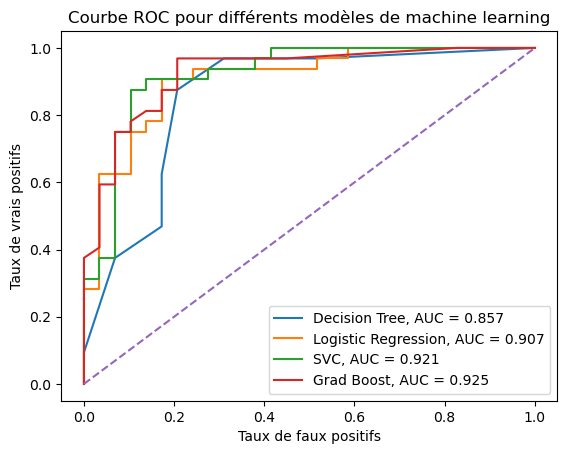

In [45]:
# Création courbes ROC
# Initialiser les modèles
models = [model_decision_tree, model_log_reg, model_SVC, model_grad_boost]
model_names = ['Decision Tree', 'Logistic Regression', 'SVC', "Grad Boost"]

# Boucle sur les modèles pour les entraîner et prédire les probabilités
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # Calculer la courbe ROC et AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # Afficher la courbe ROC
    plt.plot(fpr, tpr, label=name + ', AUC = %0.3f' % auc)
    
# Ajouter des annotations et légendes
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour différents modèles de machine learning')
plt.legend()

# Afficher la figure
plt.show()

# Création de l'API

In [1]:
from flask import Flask, request, jsonify
import pickle
import numpy as np


In [2]:
# On charge le modèle SVC

model = pickle.load(open('modeles/GradientBoost.pkl', 'rb'))


c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Initialisation de flask

app = Flask(__name__)

In [4]:
# Création des routes

@app.route("/", methods = ["GET"])
def index():
    return "API de prédiction des risques d'arrets cardiaque "

@app.route("/prediction", methods=["POST"])
def prediction():
    
    # recevoir les données en tableau numpy
    
    data = request.get_json(force = True)    
    
   # Faire la prédiction

   predict_request = model.predict(data["data"].reshape(1, -1))

    # Renvoyer la réponse au format JSON

    output = {"predict_request": int(predict_request)}
    return jsonify(output)

In [5]:
if __name__ == "__main__":
    app.run(debug = True, host = "0.0.0.0", use_reloader = False) 

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.176:5000
Press CTRL+C to quit
c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
192.168.1.176 - - [24/Feb/2023 14:06:40] "POST /prediction HTTP/1.1" 500 -
Traceback (most recent call last):
  File "c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\flask\app.py", line 2548, in __call__
    return self.wsgi_app(environ, start_response)
  File "c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\flask\app.py", line 2528, in wsgi_app
    response = self.handle_exception(e)
  File "c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    